In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
data = pd.read_csv('./gq_final_dataset.csv',encoding ='unicode escape')
#data['split'] = np.random.randn(data.shape[0],1)
msk = np.random.randn(len(data)) <= 0.8

data_train = data[msk].fillna(' ')
data_test = data[~msk].fillna(' ')

In [3]:
data_train.head()##list first five data

,Unnamed: 0,Responses,Final Score
0,0,I would tell my friends that choosing organic ...,25
1,1,Conventional because it is more accommodating ...,15
2,2,"While both sides had good points, I would say ...",25
3,3,"With an ever increasing population, it seems a...",5
4,4,They should just buy food separately from now ...,0


In [4]:
data_train.shape

(880, 3)

In [5]:
data_test.head()

,Unnamed: 0,Responses,Final Score
13,13,"Organic farming, because they cannot use conve...",25
21,21,Eat less beef and eat more sustainable foods l...,0
25,25,I woud tell my friend that the best option wou...,30
26,26,"Organic, because it has no chemicals and less ...",20
27,27,I would tell my friends that both of them are ...,5


In [6]:
data_test.shape ##test data has 52 answers

(228, 3)

In [7]:
train_sentences = data_train['Responses']
test_sentences = data_test['Responses']
sentences = pd.concat([train_sentences,test_sentences])

In [8]:
sentences.shape

(1108,)

In [9]:
label = data_train['Final Score']

In [10]:
#import nltk
#nltk.download('stopwords')
#from nltk.corpus import stopwords
#set(stopwords.words('english'))

In [11]:
stop_words = open('./stop_words.txt',encoding= 'utf-8').read().splitlines()

In [12]:
stop_words

['a',
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 "a's",
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'came',
 'can',
 'cannot',
 'cant',
 "can't",
 'cause',
 'causes',
 'certain',
 'certainly',
 'changes',
 'clearly',
 "c'mon",
 'co',
 'com',
 'come',
 'comes',
 'concerning'

In [13]:
# ci dai mo xing
# analyzer='word'指的是以词为单位进行分析，对于拉丁语系语言，有时需要以字母'character'为单位进行分析
# ngram指分析相邻的几个词，避免原始的词袋模型中词序丢失的问题
# max_features指最终的词袋矩阵里面包含语料库中出现次数最多的多少个词
from sklearn.feature_extraction.text import CountVectorizer
co = CountVectorizer(
    analyzer='word',
##avoid word order program
    ngram_range=(1,4),
    stop_words= stop_words,
    max_features = 500)

In [14]:
co.fit(sentences)##sheng cheng cidai moxing

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=500, min_df=1,
        ngram_range=(1, 4), preprocessor=None,
        stop_words=['a', 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards', 'again', 'against', "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'an...t', 'you', "you'd", "you'll", 'your', "you're", 'yours', 'yourself', 'yourselves', "you've", 'zero'],
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [15]:
# 将训练集随机拆分为新的训练集和验证集，默认3:1,然后进行词频统计
# 在机器学习中，训练集相当于课后习题，用于平时学习知识。验证集相当于模拟考试，用于检验学习成果。测试集相当于高考
# 新的训练集和验证集都来自于最初的训练集，都是有标签的。
# x_train 训练集数据 （相当于课后习题）
# x_test 验证集数据 （相当于模拟考试题）
# y_train 训练集标签 （相当于课后习题答案）
# y_test 验证集标签（相当于模拟考试题答案）
x_train,x_test,y_train,y_test = train_test_split(train_sentences,label,random_state = 0)

In [16]:
# 随便看训练集中的一个数据
x_train[2]

'While both sides had good points, I would say that inorganic farming may be slightly better due to the fact that much more land is needed for organic farming, that organic farming may not be able to sustain the growing population, and that organic farming may have equal, if not worse, effects on the environment in certain ways.'

In [17]:
#feature engineering
x_train = co.transform(x_train)
x_test= co.transform(x_test)

In [18]:
x_train[1]

<1x500 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [19]:
##logistic  regression model本单元格代码的作用是：忽略下面代码执行过程中的版本警告等无用提示
import warnings
warnings.filterwarnings('ignore')

In [20]:
from sklearn.linear_model import LogisticRegression
lg1 = LogisticRegression()
lg1.fit(x_train,y_train)
score = lg1.score(x_test,y_test)
print("bag of words,using logistic regression, the correct rate is ", score)

bag of words,using logistic regression, the correct rate is  0.3181818181818182


In [21]:
#yong classification_report get precision and recall
#from sklearn.metrics import classification_report
#print(classification_report(x_test,y_test))

In [22]:
# Returns a NumPy Array
# Predict for One Observation (image)
prediction = lg1.predict(x_test)

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [24]:
#confusion metrix 
cm = metrics.confusion_matrix(y_test,prediction)
print(cm)

[[13  2  3  6  6  0  0  0]
 [ 1  0  0  2  1  0  0  0]
 [ 2  1  5 10  4  1  0  0]
 [ 5  0  0 17 16  4  0  0]
 [ 6  0  0 18 10 23  2  0]
 [ 0  0  2  7  9 14  5  0]
 [ 0  0  0  0  3 10 11  0]
 [ 0  0  0  0  0  1  0  0]]


Text(0.5,1,'Accuracy:0.3181818181818182')

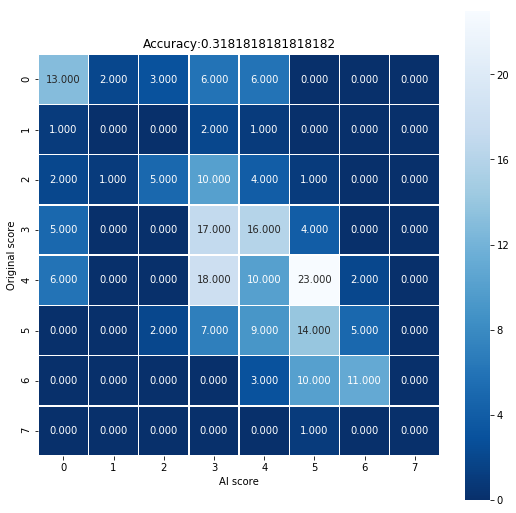

In [25]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt=".3f", linewidths=.5,square=True,cmap='Blues_r');
plt.xlabel('AI score');
plt.ylabel('Original score');

all_sample_title = 'Accuracy:{0}'.format(score)
plt.title(all_sample_title,size=12)



Accuracy: 31.818%
F1 Score:  0.2640762259183312
Precision Score:  0.2930198127469017
Recall Score:  0.2577112224473131


/home/std_student/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/std_student/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


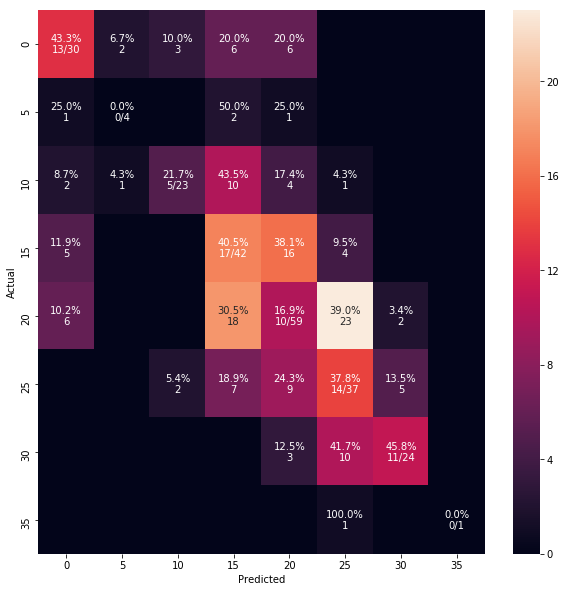

In [26]:
from sklearn import model_selection
test_size = 0.33
seed = 7
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

model = LogisticRegression()
model.fit(x_train, y_train)
result = model.score(x_test, y_test)
print("Accuracy: %.3f%%" % (result*100.0))
y_pred = model.predict(x_test)
print("F1 Score: ", f1_score(y_test, y_pred, average="macro"))
print("Precision Score: ", precision_score(y_test, y_pred, average="macro"))
print("Recall Score: ", recall_score(y_test, y_pred, average="macro")) 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.show()

cm_analysis(y_test, y_pred, model.classes_, ymap=None, figsize=(10,10))


In [49]:
#support vector machines
#from sklearn.svm import SVC
#svc = SVC(kernel = 'linear')
#svc.fit(x_train,y_train)

#prediction = svc.predict(np.random.random((2,5)))
#accuracy score
#svc.score(x_test,y_test)
#from sklearn.metrics import accuracy_score
#accuracy_score(y_test,prediction)

ValueError: X.shape[1] = 5 should be equal to 5000, the number of features at training time

In [27]:
##using naive bayes
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train,y_train)
print('using sklearn with naive bayes is ', classifier.score(x_test,y_test))

using sklearn with naive bayes is  0.3409090909090909


In [28]:
# 用sklearn库中的TfidfVectorizer构建TF-IDF模型
# analyzer='word'指的是以词为单位进行分析，对于拉丁语系语言，有时需要以字母'character'为单位进行分析
# ngram指分析相邻的几个词，避免原始的词袋模型中词序丢失的问题
# max_features指最终的词袋矩阵里面包含语料库中出现次数最多的多少个词
# TF-IDF模型是专门用来过滤掉烂大街的词的，所以不需要引入停用词stop_words

from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(
    analyzer='word',
    ngram_range=(1,4),
    # stop_words=stop_words,
    max_features=5000
)

In [29]:
tf.fit(sentences)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=1,
        ngram_range=(1, 4), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_sentences,label,random_state=1234)

In [31]:
x_train = tf.transform(x_train)
x_test = tf.transform(x_test)

In [32]:
x_train[1]

<1x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 71 stored elements in Compressed Sparse Row format>

In [33]:
#引用朴素贝叶斯进行分类训练和预测
classifier = MultinomialNB()
classifier.fit(x_train,y_train)
print('using sklearn with naive bayes is ', classifier.score(x_test,y_test))

using sklearn with naive bayes is  0.3


In [34]:
# sklearn默认的逻辑回归模型
lg1 = LogisticRegression()
lg1.fit(x_train,y_train)
print("bag of words,using logistic regression, the correct rate is ", lg1.score(x_test,y_test))

bag of words,using logistic regression, the correct rate is  0.3090909090909091


In [35]:
# C：Regularization，C越小，正则化效果越强
# dual：求解原问题的对偶问题
lg2 = LogisticRegression(C=7, dual=True)
lg2.fit(x_train,y_train)
print('TF-IDF with two extra parameters:',lg2.score(x_test,y_test))

TF-IDF with two extra parameters: 0.3409090909090909


In [36]:
# find best hyper-parameter
from sklearn.model_selection import GridSearchCV
param_grid = {'C':range(1,10),
             'dual':[True,False]
              }
lgGS = LogisticRegression()
grid = GridSearchCV(lgGS, param_grid=param_grid,cv=3,n_jobs=-1)
grid.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': range(1, 10), 'dual': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [37]:
grid.best_params_

{'C': 8, 'dual': True}

In [38]:
lg_final = grid.best_estimator_

In [39]:
print('final:',lg_final.score(x_test,y_test))

final: 0.35


[[ 7  0  0 16  7  0  0  0]
 [ 1  0  0  2  1  0  0  0]
 [ 0  0  0 15  5  2  1  0]
 [ 0  0  0 16 20  6  0  0]
 [ 1  0  0 17 22 19  0  0]
 [ 0  0  0  6 14 12  5  0]
 [ 0  0  0  1  4  8 11  0]
 [ 0  0  0  0  0  1  0  0]]


Text(0.5,1,'Accuracy:0.3181818181818182')

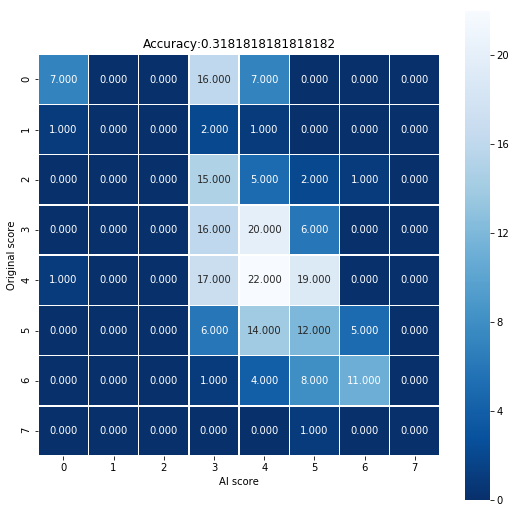

In [40]:
# Returns a NumPy Array
# Predict for One Observation (image)
prediction = lg1.predict(x_test)
#confusion metrix 
cm = metrics.confusion_matrix(y_test,prediction)
print(cm)

plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt=".3f", linewidths=.5,square=True,cmap='Blues_r');
plt.xlabel('AI score');
plt.ylabel('Original score');

all_sample_title = 'Accuracy:{0}'.format(score)
plt.title(all_sample_title,size=12)

Accuracy: 30.909%
F1 Score:  0.22368835861287986
Precision Score:  0.27442306831408364
Recall Score:  0.22122809098444693


/home/std_student/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/std_student/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


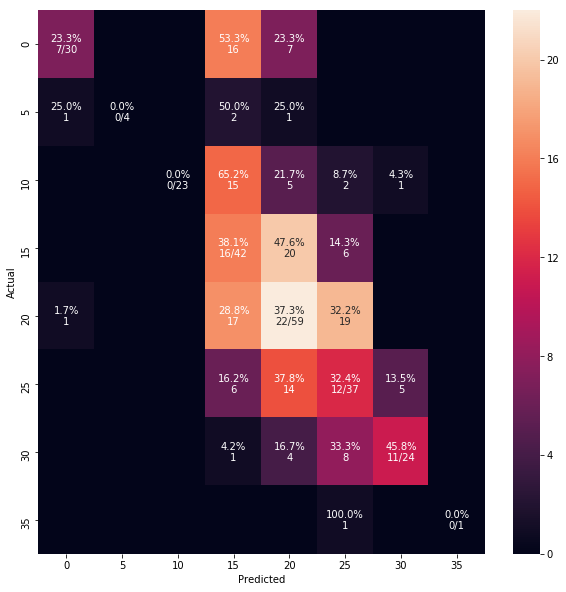

In [41]:
from sklearn import model_selection
test_size = 0.33
seed = 7
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

model = LogisticRegression()
model.fit(x_train, y_train)
result = model.score(x_test, y_test)
print("Accuracy: %.3f%%" % (result*100.0))
y_pred = model.predict(x_test)
print("F1 Score: ", f1_score(y_test, y_pred, average="macro"))
print("Precision Score: ", precision_score(y_test, y_pred, average="macro"))
print("Recall Score: ", recall_score(y_test, y_pred, average="macro")) 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.show()

cm_analysis(y_test, y_pred, model.classes_, ymap=None, figsize=(10,10))

In [42]:
#from sklearn.metrics import precision_score
#precision_score(x_test,y_test,average = 'micro')


In [43]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, prediction)

58.97727272727273